# Reanalysis Datasets
- Author: Hamid
- Date: Mar 10, 2022

ERA5 is a high-resolution global atmospheric reanalysis dataset produced by the European Centre for Medium-Range Weather Forecasts (ECMWF). It provides a comprehensive set of atmospheric, land-surface, and sea-state variables, such as temperature, precipitation, wind, and pressure, with a spatial resolution of approximately 0.25° x 0.25° and a temporal resolution of one hour.

1. Signup: https://cds.climate.copernicus.eu/user/
2. Notedown API key and UID: https://cds.climate.copernicus.eu/user/

## Install cdsapirc

In [1]:
# !pip install cdsapirc

create a file `.cdsapirc` in home directory to store UID and API Key

In [4]:
!touch ~/.cdsapirc

In [6]:
%%bash
{
  echo 'url: https://cds.climate.copernicus.eu/api/v2'
  echo 'key: 88888:aaaa-1111-bbbb-cccc-defghijklmn'
  echo 'verify: 0'
} > ~/.cdsapirc

In [53]:
!cat ~/.cdsapirc

url: https://cds.climate.copernicus.eu/api/v2
key: 72508:12a2ff5a-006e-4660-b622-110a8ee09418
verify: 0


In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
import cdsapi

c = cdsapi.Client()
def download_data(year, month, day):
    c.retrieve(
        'reanalysis-era5-pressure-levels',
        {
            'product_type': 'reanalysis',
            'format': 'netcdf',
            'variable': [
                'u_component_of_wind', 'v_component_of_wind',
            ],
            'pressure_level': [
                '1', '2', '3',
                '5', '7', '10',
                '20', '30', '50',
                '70', '100', '125',
                '150', '175', '200',
                '225', '250', '300',
                '350', '400', '450',
                '500', '550', '600',
                '650', '700', '750',
                '775', '800', '825',
                '850', '875', '900',
                '925', '950', '975',
                '1000',
            ],
            'year': year,
            'month': month,
            'day': day,
            'time': [
                '00:00', '01:00', '02:00',
                '03:00', '04:00', '05:00',
                '06:00', '07:00', '08:00',
                '09:00', '10:00', '11:00',
                '12:00', '13:00', '14:00',
                '15:00', '16:00', '17:00',
                '18:00', '19:00', '20:00',
                '21:00', '22:00', '23:00',
            ],
            'area': [
                32, -80, 25,
                -64,
            ],
        },
        f'era5_uv_{year}_{month}_{day}.nc')

In [6]:
download_data("2005","06", "20")

/depot/dawson29/data/Projects/PERiLS/apps/perils/lib/python3.10/site-packages/urllib3/connectionpool.py:1045: InsecureRequestWarning: Unverified HTTPS request is being made to host 'cds.climate.copernicus.eu'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(
2023-01-19 23:12:32,404 INFO Welcome to the CDS
2023-01-19 23:12:32,405 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
/depot/dawson29/data/Projects/PERiLS/apps/perils/lib/python3.10/site-packages/urllib3/connectionpool.py:1045: InsecureRequestWarning: Unverified HTTPS request is being made to host 'cds.climate.copernicus.eu'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(
2023-01-19 23:12:32,579 INFO Request is completed
2023-01-19 23:12:32,579 INFO Downloading https://down

In [9]:
ls

EAPS526_HW#1.ipynb  era_5_data_download.ipynb  era5_uv_2005_06_20.nc


In [49]:
era_ds = xr.open_dataset("era5_uv_2005_06_20.nc")

In [50]:
era_ds

<xarray.Dataset>
Dimensions:    (longitude: 65, latitude: 29, level: 37, time: 24)
Coordinates:
  * longitude  (longitude) float32 -80.0 -79.75 -79.5 ... -64.5 -64.25 -64.0
  * latitude   (latitude) float32 32.0 31.75 31.5 31.25 ... 25.5 25.25 25.0
  * level      (level) int32 1 2 3 5 7 10 20 30 ... 850 875 900 925 950 975 1000
  * time       (time) datetime64[ns] 2005-06-20 ... 2005-06-20T23:00:00
Data variables:
    u          (time, level, latitude, longitude) float32 ...
    v          (time, level, latitude, longitude) float32 ...
Attributes:
    Conventions:  CF-1.6
    history:      2023-01-20 04:11:46 GMT by grib_to_netcdf-2.25.1: /opt/ecmw...

## NCEP/NCAR Reanalysis

You can read its description here: https://psl.noaa.gov/data/gridded/data.ncep.reanalysis.html

In [4]:
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import numpy as np
import cartopy.crs as ccrs
import cartopy.feature as feat
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import xarray as xr
import urllib.request
import io

In [51]:
def add_map(ax, b = 0, t=0, l = 0, r = 0):
    gl = ax.gridlines(crs=ccrs.PlateCarree(), linewidth=0.3, color='black', alpha=0.3, 
                         linestyle='-', draw_labels=True)
    gl.xlabels_top = t
    gl.xlabels_bottom = b
    gl.ylabels_left = l
    gl.ylabels_right=r
    gl.xlines = True
    gl.ylines = True
    gl.xformatter = LONGITUDE_FORMATTER
    gl.yformatter = LATITUDE_FORMATTER
    ax.add_feature(feat.BORDERS)
#     ax.add_feature(feat.LAND, lw = 0.3, fc = [0.9,0.9,0.9])
    ax.add_feature(feat.COASTLINE,)
#     ax.add_feature(feat.OCEAN, alpha = 0.5)
#     ax.add_feature(feat.STATES.with_scale("10m"), alpha = 0.5, lw = 0.5, ls = "--")

In [6]:
def load_data_from_web(url):
    '''url(str): Data file address/link'''
    req = urllib.request.Request(url)
    with urllib.request.urlopen(req) as resp:
        ds = xr.open_dataset(io.BytesIO(resp.read()))
    return ds

https://psl.noaa.gov/thredds/catalog/Datasets/ncep.reanalysis/Dailies/pressure/catalog.html

In [11]:
url1 = "https://psl.noaa.gov/thredds/fileServer/Datasets/ncep.reanalysis/Dailies/pressure/vwnd.2021.nc"
url2 = "https://psl.noaa.gov/thredds/fileServer/Datasets/ncep.reanalysis/Dailies/pressure/uwnd.2021.nc"
url3 = "https://psl.noaa.gov/thredds/fileServer/Datasets/ncep.reanalysis/Dailies/pressure/air.2021.nc"

In [12]:
ds = []
for url in [url1, url2, url3]:
    ds.append(load_data_from_web(url))
ds = xr.merge(ds)

In [13]:
def align_coords(ds):
    ds.coords['lon'] = (ds.coords['lon'] + 180) % 360 - 180
    ds = ds.sortby(["lat", "lon"])
    return ds

In [14]:
ds = align_coords(ds)

In [15]:
wnd = np.sqrt(ds.vwnd**2 + ds.uwnd**2)
x,y = np.meshgrid(wnd.lon, wnd.lat)
u = ds.uwnd.mean("time").isel(level = 2)
v = ds.vwnd.mean("time").isel(level = 2)

In [16]:
# convert temp to degree celcius
tempC = ds.air-273.15

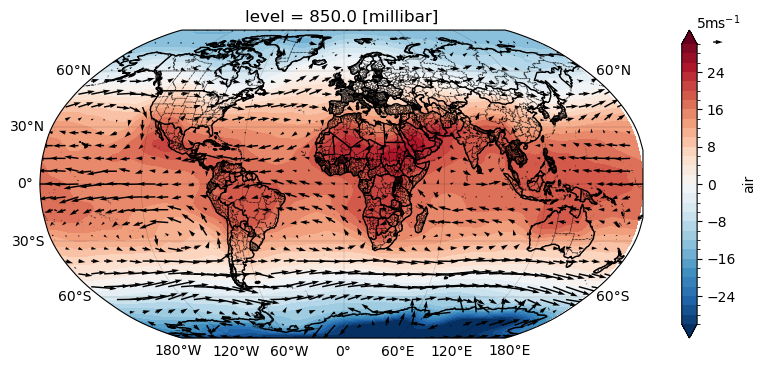

In [17]:
fig = plt.figure(figsize = [10, 4])
ax = plt.axes(projection = ccrs.Robinson())
tempC.mean("time").isel(level = 2).plot.contourf(extend = 'both', ax=ax, cmap = "RdBu_r",
                                                     levels=np.arange(-30, 30.1, 2), transform=ccrs.PlateCarree())
Q = plt.quiver(x,y,u,v,regrid_shape=25, transform=ccrs.PlateCarree())
plt.quiverkey(Q,0.82,0.85,U=5,label='5ms$^{-1}$',coordinates='figure',labelpos='N',zorder=1)
add_map(ax, b=1, l=1)

In [18]:
%%time
base_url = "https://psl.noaa.gov/thredds/fileServer/Datasets/ncep.reanalysis/Dailies/pressure/{variable}.{year}.nc"
years = [2020,]
variables = ["air",]


ds = []
for variable in variables:
    for year in years:
        url = base_url.replace("{variable}", variable).replace("{year}", str(year))
        ds.append(load_data_from_web(url))
ds = xr.merge(ds)

CPU times: user 165 ms, sys: 215 ms, total: 380 ms
Wall time: 1.54 s


In [19]:
ds = align_coords(ds)

In [65]:
# convert temp to degree celcius
tempC = ds.air-273.15

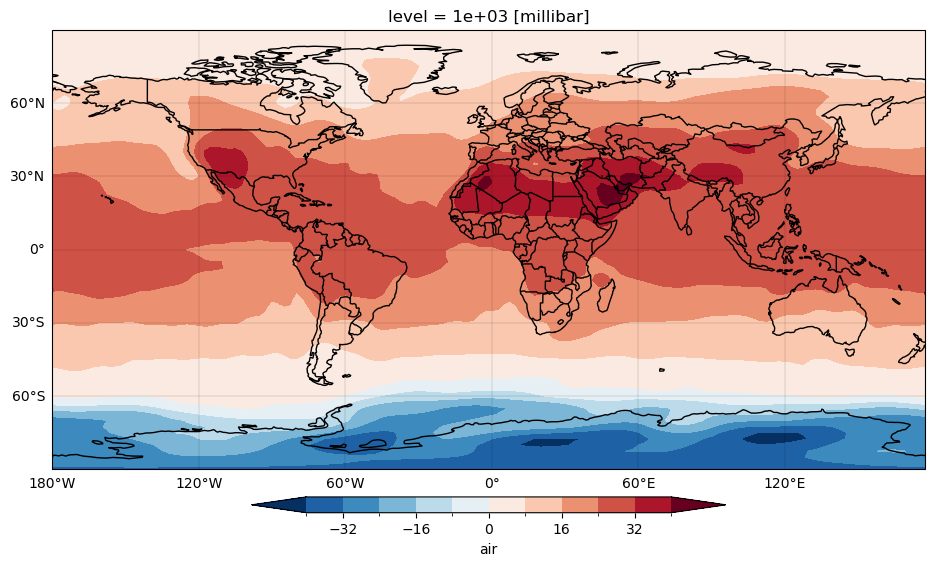

In [94]:
fig = plt.figure(figsize = [10, 6])
ax = plt.axes(projection = ccrs.PlateCarree())
tempC.sel(time=slice("2020-06", "2020-08"), level=1000).mean("time").plot.contourf(
    extend = 'both',
    ax=ax, 
    cmap = "RdBu_r",
    cbar_kwargs ={'orientation':"horizontal",
                  "shrink":0.5,
                  "pad":0.05,
                  'extendfrac':.15,
                  'aspect': 30,
                 },
    levels = np.arange(-40, 41, 8),
    )

add_map(ax, b=1, l=1)
plt.tight_layout()